# What drives the price of a car?

![](../images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## **CRISP-DM Framework**

<center>
    <img src = ../images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## **Business Understanding**

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Here are the data mining goals for the task of identifying key drivers for used car prices, framed according to the CRISP-DM framework:

**1. Predictive Modeling:**
Develop a model to estimate the price of a used car based on features like make, model, year, mileage, and condition. Evaluate various modeling techniques to identify the most accurate and robust model.

**2. Feature Importance:**
Identify and rank key features that influence car prices. Use methods like feature importance scores and correlation analysis to determine what consumers value most.

**3. Segment Analysis:**
Perform segmentation to group cars into categories based on similar characteristics and price ranges. Use clustering techniques to understand different market segments.

**4. Trend Analysis:**
Analyze trends over time to understand how factors such as market demand and seasonality affect car prices. Use time series analysis to uncover these trends.

**5. Data Quality Assessment:**
Ensure data quality by addressing missing values, outliers, and inconsistencies. Prepare clean data for accurate modeling.

**6. Model Deployment and Monitoring:**
Develop a plan to deploy the predictive model for real-world use, assisting in pricing decisions. Establish monitoring and maintenance processes to keep the model accurate over time.


*Note: As the dataset does not contain the transaction date we cannot perform trend analysis based on different seasons.*


## **Data Understanding**

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### ***Import Modules***

In [1]:
!pip install --quiet --upgrade pandas numpy scikit-learn matplotlib seaborn xgboost imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust Pandas settings to display all columns and avoid truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows (if needed)
pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.width', None)  # Automatically adjust the display width

### ***Load the dataset***

In [2]:
# Load the dataset
file_path = '../data/vehicles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
388814,7304276223,vermont,5500,2012.0,honda,civic lx,good,4 cylinders,gas,106189.0,clean,automatic,NaN,fwd,compact,sedan,silver,vt
396372,7313266598,richmond,9995,1997.0,chevrolet,corvette convertible,NaN,8 cylinders,gas,87783.0,clean,automatic,NaN,4wd,NaN,convertible,white,va
148776,7312413207,"st louis, MO",17000,1966.0,ford,thunderbird,excellent,8 cylinders,gas,39000.0,clean,automatic,NaN,rwd,mid-size,coupe,blue,il
39762,7314851126,monterey bay,338,2016.0,bmw,5 series,NaN,6 cylinders,gas,42911.0,clean,automatic,WBA5B1C5XGG132369,rwd,NaN,sedan,NaN,ca
216685,7315111902,rochester,6977,2012.0,chevrolet,cruze lt,NaN,NaN,gas,104952.0,clean,automatic,1G1PF5SC5C7248153,fwd,NaN,sedan,red,mn
129761,7314432468,hawaii,24995,2011.0,toyota,tacoma sr5,excellent,4 cylinders,gas,67986.0,clean,automatic,NaN,NaN,NaN,truck,NaN,hi
87446,7303967560,new haven,19900,1978.0,chevrolet,monte carlo,excellent,NaN,gas,86000.0,missing,automatic,NaN,NaN,NaN,NaN,NaN,ct
32237,7314125707,inland empire,500,2013.0,nissan,maxima,NaN,NaN,gas,130000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca
11273,7316311762,phoenix,10500,2002.0,ford,thunderbird,excellent,8 cylinders,gas,159400.0,clean,automatic,NaN,rwd,mid-size,convertible,silver,az
97688,7301678561,gainesville,124,2016.0,toyota,yaris le,excellent,4 cylinders,gas,108460.0,NaN,automatic,VNKKTUD36GA063031,NaN,NaN,hatchback,NaN,fl


In [3]:
# Shape of the original dataset
df.shape

(426880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### ***Drop Redundant Features***

In [5]:
# Drop 'id' and 'VIN' columns
df_cleaned = df.drop(columns=['id', 'VIN'])
df_cleaned.shape

(426880, 16)

The purpose of dropping the 'id' and 'VIN' columns is to remove unique identifiers that do not contribute to the analysis or modeling process. These columns typically contain information that is not useful for predicting car prices or other features, and keeping them could unnecessarily complicate the dataset.

### ***Drop Duplicates***

In [6]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape

(370465, 16)

The purpose of dropping duplicates is to ensure that each entry in the dataset is unique, which prevents redundant data from skewing analysis or models. This process helps improve the accuracy and reliability of data insights and reduces computational overhead.

### ***Examine Cardinality of Categorical Variables***

In [7]:
# Check cardinality of categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f'Column: {column}, Unique value count: {df_cleaned[column].nunique()}')

Column: region, Unique value count: 404
Column: manufacturer, Unique value count: 42
Column: model, Unique value count: 29649
Column: condition, Unique value count: 6
Column: cylinders, Unique value count: 8
Column: fuel, Unique value count: 5
Column: title_status, Unique value count: 6
Column: transmission, Unique value count: 3
Column: drive, Unique value count: 3
Column: size, Unique value count: 4
Column: type, Unique value count: 13
Column: paint_color, Unique value count: 12
Column: state, Unique value count: 51


Examining unique value counts in the dataset helps identify the cardinality of categorical columns, which is the number of distinct values each column contains. This information is crucial for understanding the complexity of the dataset, identifying potential issues such as high cardinality that might require special handling, and ensuring appropriate preprocessing steps are applied.

### ***Drop High Cardinality Categorical Variables***

In [8]:
# dropping high cardinality variables
df_cleaned.drop(columns=['model', 'region', 'state'], inplace=True)
df_cleaned.shape

(370465, 13)

Dropping high cardinality categorical variables, such as 'model', 'region', and 'state', is necessary because these variables contain a large number of unique values, which can lead to overfitting and increased computational complexity in machine learning models. High cardinality can also make it difficult to effectively encode these variables into numerical formats required by most algorithms, potentially degrading model performance.

### ***Drop Missing Values***

In [9]:
# Replace 'other' with NaN
df_cleaned.replace('other', np.nan, inplace=True)

# Replace 0 values with NaN
df_cleaned.replace(0, np.nan, inplace=True)

# Drop rows with missing values
df_cleaned.dropna(inplace=True)

# Verify that there are no more missing values
print(df_cleaned.isnull().sum())

# Review the shape of the dataset after cleanup
df_cleaned.shape

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


(66938, 13)

Dropping missing values in the dataset is crucial to maintain the integrity and quality of the data. Missing values can lead to inaccurate analysis and biased model predictions. By replacing placeholder values ('other' and 0) with NaN and then dropping rows with NaN, the code ensures that only complete and reliable data is used for analysis and modeling, thereby improving the accuracy and robustness of the results.

### ***Clean the "cylinders" column and convert it to integer***

In [10]:
# Ensure the 'cylinders' column is treated as a string
df_cleaned['cylinders'] = df_cleaned['cylinders'].astype(str)

# Remove 'cylinders' text and convert to integer, handling NaN values appropriately
df_cleaned['cylinders'] = df_cleaned['cylinders'].str.extract(r'(\d+)')
df_cleaned['cylinders'] = pd.to_numeric(df_cleaned['cylinders'], errors='coerce').astype('Int64')

# Verify the changes
print(df_cleaned['cylinders'].unique())

<IntegerArray>
[6, 8, 4, 5, 10, 3, 12]
Length: 7, dtype: Int64


Cleaning the data in the "cylinders" column ensures that the values are in a consistent numeric format, which is necessary for accurate analysis and modeling. By removing non-numeric text and converting the values to integers, the code facilitates meaningful comparisons and calculations, and ensures that the data can be properly interpreted by machine learning algorithms.

### ***Convert 'year' to integer***

In [11]:
# Convert 'year' to integer if not already
df_cleaned['year'] = df_cleaned['year'].astype('Int64')

Converting the datatype in the "year" column to 'Int64' ensures that the values are treated as integers, which is necessary for numerical operations and analysis. This conversion allows for accurate calculations, comparisons, and modeling, as the "year" values can be used in mathematical operations and algorithms that require numeric input.

### ***Identify and Handle Outliers***

In [12]:
# Removing outliers using IQR
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[(df_cleaned['price'] >= Q1 - 1.5 * IQR) & (df_cleaned['price'] <= Q3 + 1.5 * IQR)]


Q1 = df_cleaned['year'].quantile(0.25)
Q3 = df_cleaned['year'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[(df_cleaned['year'] >= Q1 - 1.5 * IQR) & (df_cleaned['year'] <= Q3 + 1.5 * IQR)]

df_cleaned.shape

(59759, 13)

Removing outliers in the "price" and "year" columns is crucial to prevent extreme values from skewing the analysis and model predictions. By using the IQR method to filter out these outliers, the dataset becomes more representative of the typical values, leading to more accurate and robust results.

In [13]:
df_cleaned.sample(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
372054,6000.0,2006,buick,excellent,6,gas,62749.0,clean,automatic,fwd,full-size,sedan,silver
295106,19995.0,2015,ford,good,4,gas,70970.0,clean,automatic,rwd,mid-size,coupe,yellow
64031,2400.0,2000,mercury,good,8,gas,126555.0,salvage,automatic,4wd,mid-size,SUV,red
187182,6.0,2004,ford,excellent,8,gas,168.0,clean,automatic,rwd,full-size,pickup,yellow
111354,1.0,2018,ford,excellent,4,gas,16003.0,rebuilt,automatic,4wd,mid-size,SUV,blue
354978,13992.0,2011,lexus,good,6,gas,125263.0,clean,automatic,fwd,mid-size,SUV,grey
160453,3500.0,2004,buick,good,6,gas,136000.0,clean,automatic,fwd,mid-size,sedan,red
64888,11800.0,2000,ford,good,8,diesel,250000.0,clean,automatic,4wd,full-size,pickup,white
231477,35000.0,2016,kia,like new,6,gas,51200.0,clean,automatic,fwd,mid-size,SUV,white
218572,3995.0,2003,honda,good,4,gas,256159.0,clean,automatic,fwd,mid-size,sedan,black


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59759 entries, 31 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         59759 non-null  float64
 1   year          59759 non-null  Int64  
 2   manufacturer  59759 non-null  object 
 3   condition     59759 non-null  object 
 4   cylinders     59759 non-null  Int64  
 5   fuel          59759 non-null  object 
 6   odometer      59759 non-null  float64
 7   title_status  59759 non-null  object 
 8   transmission  59759 non-null  object 
 9   drive         59759 non-null  object 
 10  size          59759 non-null  object 
 11  type          59759 non-null  object 
 12  paint_color   59759 non-null  object 
dtypes: Int64(2), float64(2), object(9)
memory usage: 6.5+ MB


## **Data Preparation**

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### ***Apply log transformer on the "odometer" feature***

In [15]:
# Apply log transformation to the 'odometer' column in-place
log_transformer = FunctionTransformer(np.log1p, validate=True)
df_cleaned['odometer'] = log_transformer.fit_transform(df_cleaned[['odometer']])

Applying a log transformation to the "odometer" feature helps normalize the data, reducing skewness and making the distribution more symmetric. This transformation stabilizes variance and makes patterns in the data more apparent, which can improve the performance and accuracy of machine learning models.

### ***Add a new feature "Car Age", assuming the current year is 2024 for this calculation***

In [16]:
from datetime import datetime

# Fetch the current year
current_year = datetime.now().year

# Calculate the age of the car and drop the year column
df_cleaned['car_age'] = current_year - df_cleaned['year']
df_cleaned.drop(columns=['year'], inplace=True)
df_cleaned.sample(10)

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,car_age
262441,2000.0,dodge,good,6,gas,11.512935,clean,automatic,rwd,full-size,sedan,black,12
181124,24500.0,ford,excellent,8,gas,10.893047,clean,manual,rwd,full-size,convertible,white,11
310945,33990.0,honda,good,6,gas,11.081696,clean,automatic,4wd,full-size,SUV,blue,8
348492,13900.0,chevrolet,new,6,gas,11.820418,clean,automatic,rwd,full-size,coupe,black,10
281702,6400.0,subaru,like new,4,gas,11.728045,clean,automatic,4wd,mid-size,coupe,blue,17
207576,29995.0,gmc,good,8,gas,11.849441,clean,automatic,4wd,full-size,truck,black,8
92219,8950.0,toyota,excellent,6,gas,12.476954,clean,automatic,rwd,mid-size,SUV,silver,21
30501,4300.0,nissan,excellent,6,gas,12.049425,clean,automatic,fwd,mid-size,SUV,silver,19
396862,7300.0,ford,like new,8,diesel,12.429220,clean,automatic,rwd,full-size,sedan,white,23
201943,14700.0,toyota,like new,4,gas,11.217144,clean,automatic,4wd,full-size,SUV,black,10


Adding the "Car Age" feature using the "year" feature provides a more intuitive measure of a vehicle's age, which is often more relevant for analysis and modeling than the raw year of manufacture. It simplifies comparisons and calculations related to vehicle depreciation and wear, improving the model's ability to predict prices and other outcomes.

### ***Understand the distribution of Numerical Features***

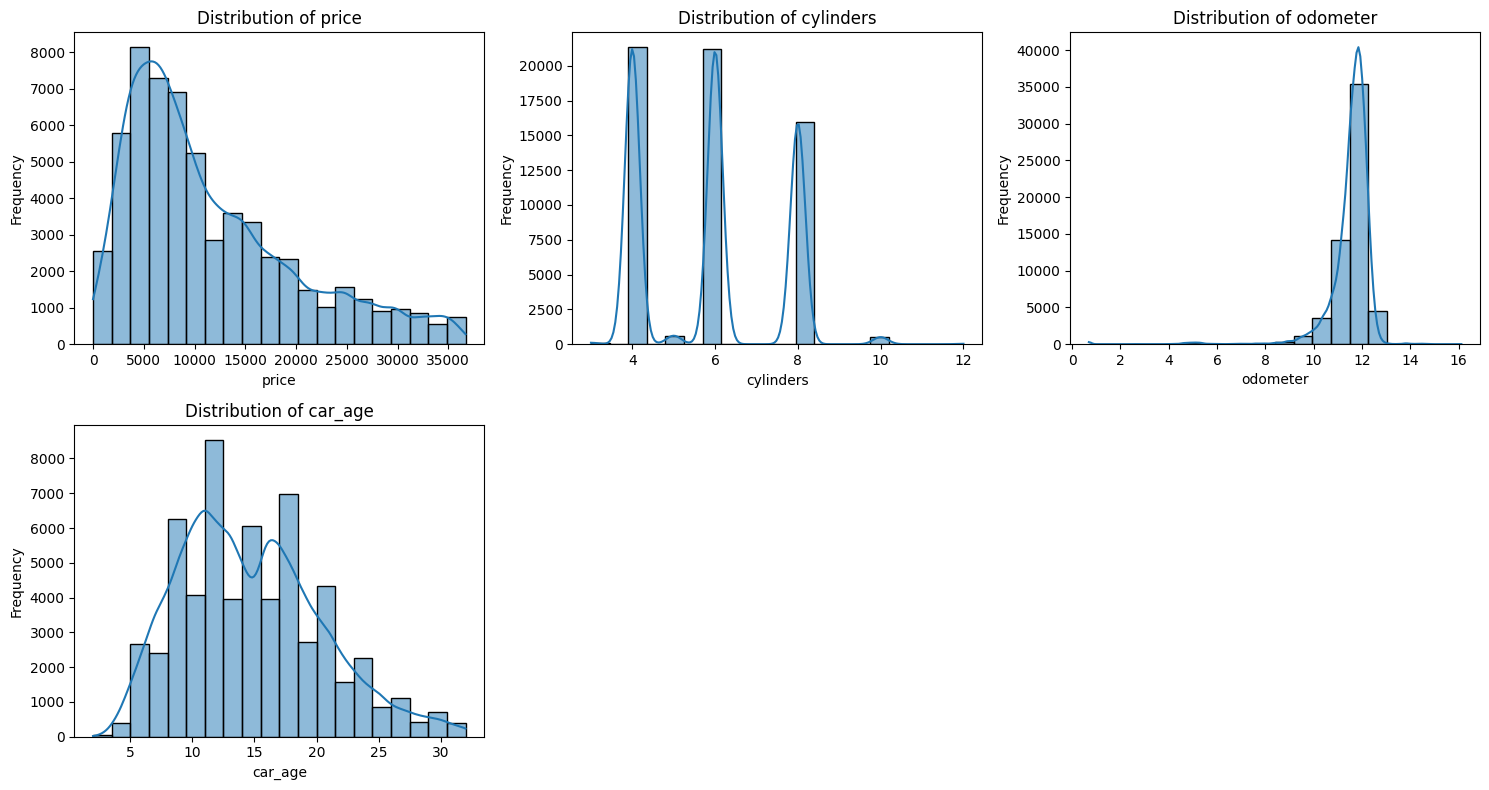

In [17]:
def plot_feature_distributions(df):
    """
    Plots the distributions of each feature in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame with features to plot.
    """
    num_features = len(df.columns)
    num_rows = (num_features + 2) // 3

    plt.figure(figsize=(15, 4 * num_rows))
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.histplot(data=df, x=col, kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Select only numeric columns
numerical_columns_df = df_cleaned.select_dtypes(exclude=['object'])

# Plot feature distributions
plot_feature_distributions(numerical_columns_df)

This set of histograms displays the distribution of four numerical features in the dataset: price, cylinders, odometer, and car age.

**Price Distribution:** The histogram shows a right-skewed distribution, indicating that most cars are priced lower, around $5,000 to $10,000, with fewer cars in the higher price ranges, up to around $35,000. The presence of a long tail suggests the existence of a few high-priced outliers.

**Cylinders Distribution:** The histogram for cylinders reveals a multimodal distribution with distinct peaks at 4, 6, and 8 cylinders, which are common engine configurations in cars. This indicates that the dataset predominantly includes cars with these cylinder counts, while cars with 5, 10, and 12 cylinders are relatively rare.

**Odometer Distribution:** The odometer values, which have been log-transformed, display a nearly normal distribution, centered around a log value of approximately 12. This transformation reduces skewness, making the data more symmetrical and suitable for analysis, suggesting most cars have moderate mileage.

**Car Age Distribution:** The car age histogram shows a relatively uniform distribution with a slight right skew. Most cars are between 5 and 20 years old, with fewer very new (under 5 years) and very old cars (over 25 years).

These distributions provide insights into the characteristics of the dataset, highlighting common values and outliers for key numerical features.

### ***Understand the distribution of Categorical Features***

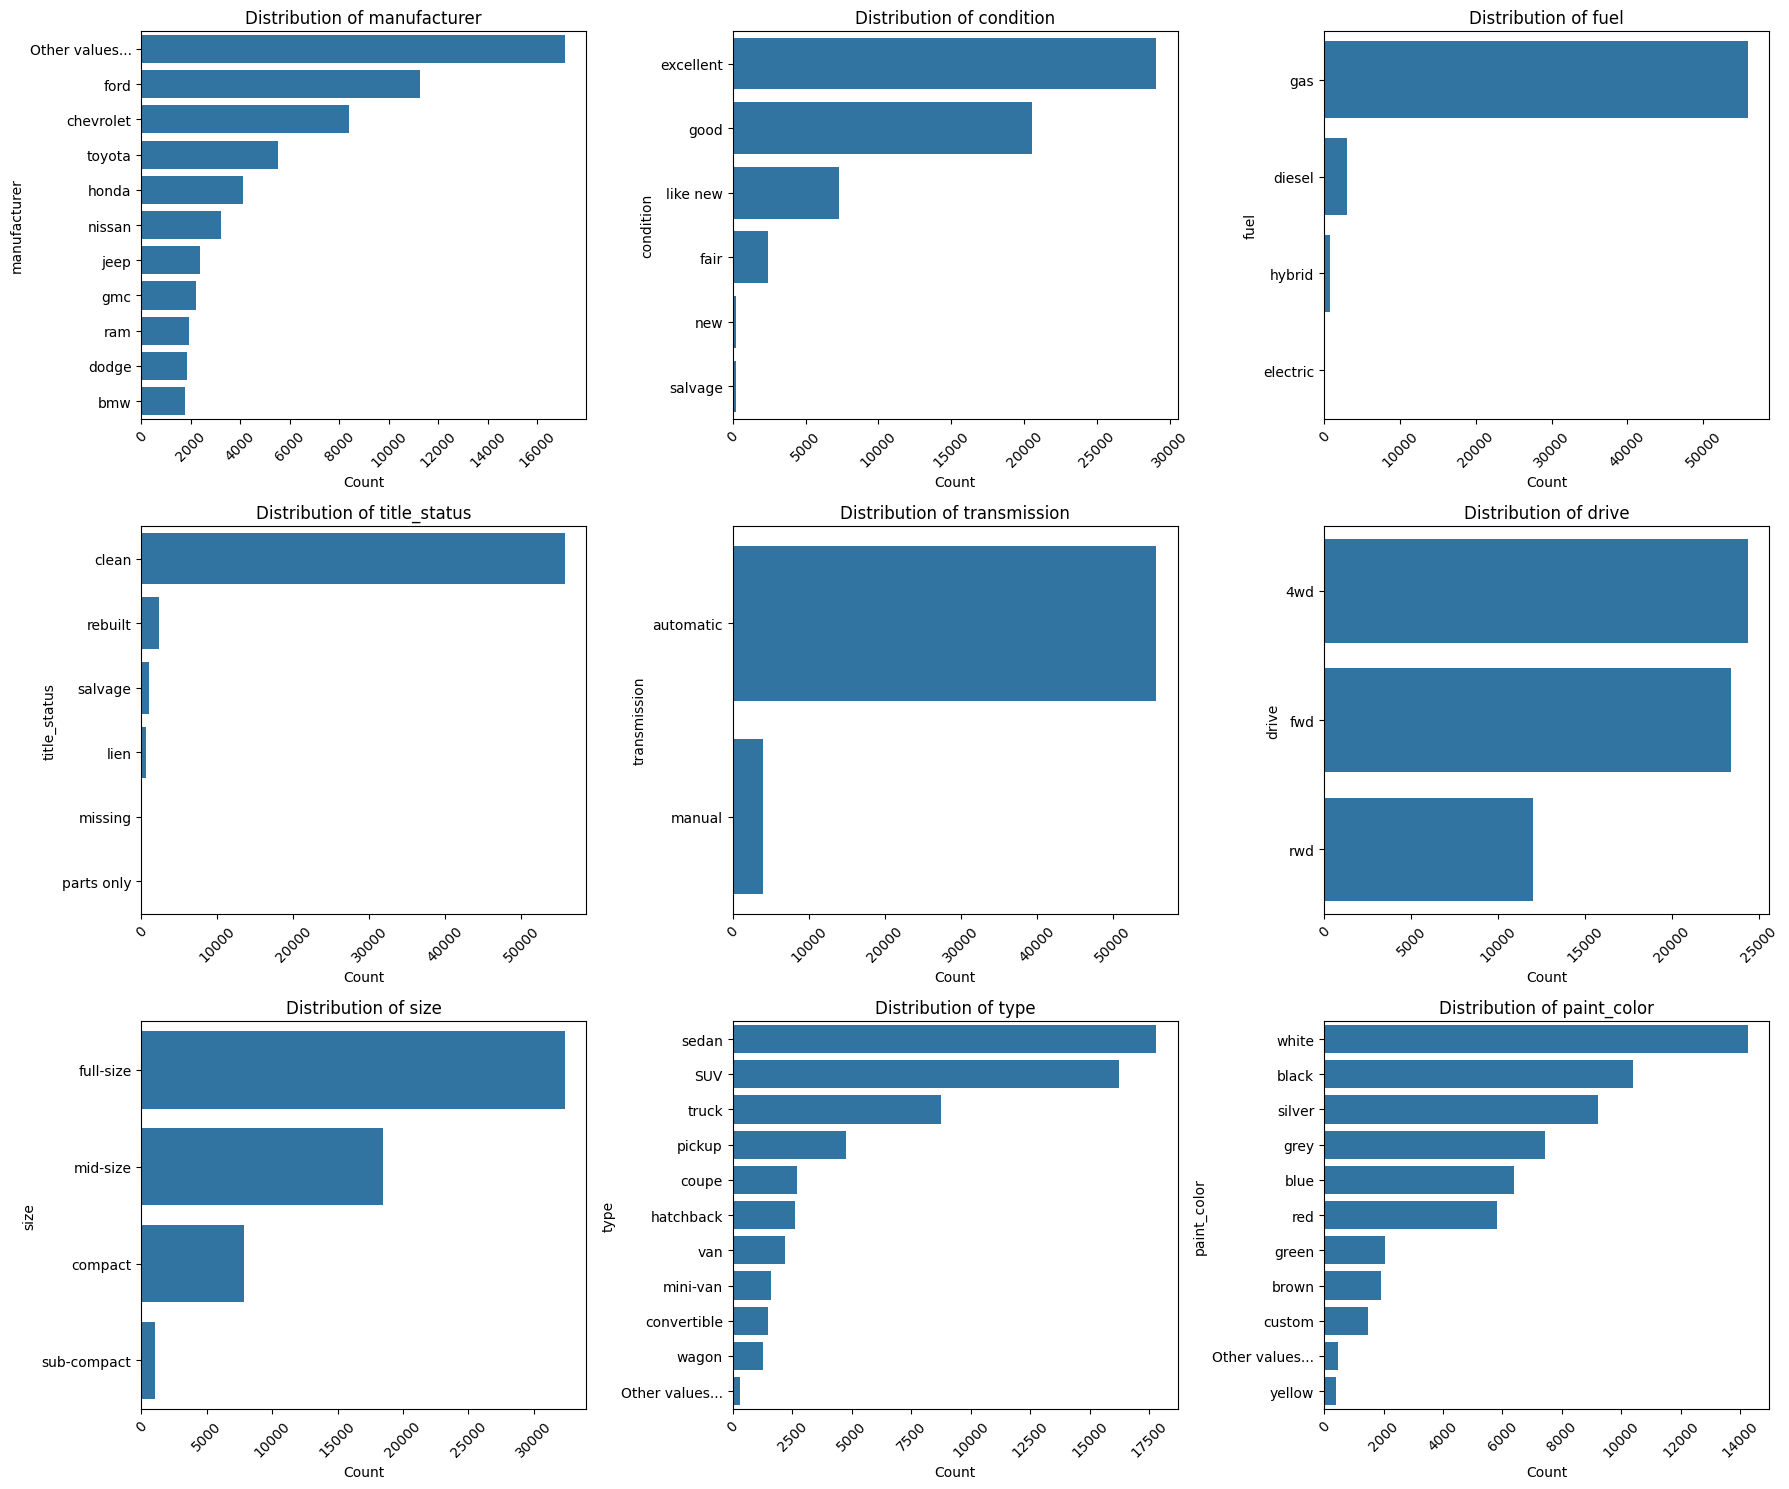

In [18]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns

# Preprocess categorical columns to group less frequent categories
for col in categorical_columns:
    top_5 = df_cleaned[col].value_counts().nlargest(10).index
    df_cleaned[col] = df_cleaned[col].apply(lambda x: x if x in top_5 else 'Other values...')

# Number of categorical columns
num_categorical = len(categorical_columns)

# Create subplots for categorical feature distribution
num_rows = (num_categorical + 2) // 3
plt.figure(figsize=(18, 5 * num_rows))

for i, col in enumerate(categorical_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(y=col, data=df_cleaned, order=df_cleaned[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This graphs display the distribution of categoraical features in the dataset:

+ **Distribution of Manufacturer:** The majority of cars are from manufacturers like Ford, Chevrolet, and Toyota, with a significant portion grouped under "Other values".
+ **Distribution of Condition:** Most cars are in 'good' or 'excellent' condition, with fewer cars in 'like new', 'fair', 'new', or 'salvage' condition.
+ **Distribution of Fuel:** Gasoline-powered cars dominate the dataset, followed by a small number of diesel, hybrid, and electric cars.
+ **Distribution of Title Status:** The majority of cars have a 'clean' title, with smaller counts for 'rebuilt', 'salvage', 'lien', 'missing', and 'parts only'.
+ **Distribution of Transmission:** Automatic transmissions are far more common than manual transmissions.
+ **Distribution of Drive:** Front-wheel drive (fwd) and four-wheel drive (4wd) vehicles are the most common, with rear-wheel drive (rwd) being less frequent.
+ **Distribution of Size:** Full-size and mid-size cars are the most prevalent, followed by compact and sub-compact cars.
+ **Distribution of Type:** Sedans, SUVs, and trucks are the most common types, with fewer pickups, coupes, hatchbacks, vans, minivans, convertibles, and wagons.
+ **Distribution of Paint Color:** White, black, silver, and grey are the most common paint colors, while colors like yellow and custom are less frequent.

These distributions provide insights into the characteristics of the dataset, highlighting common values and outliers for key categorical features.

### ***Examine the relationship between Features and the Target variable (`price`).***

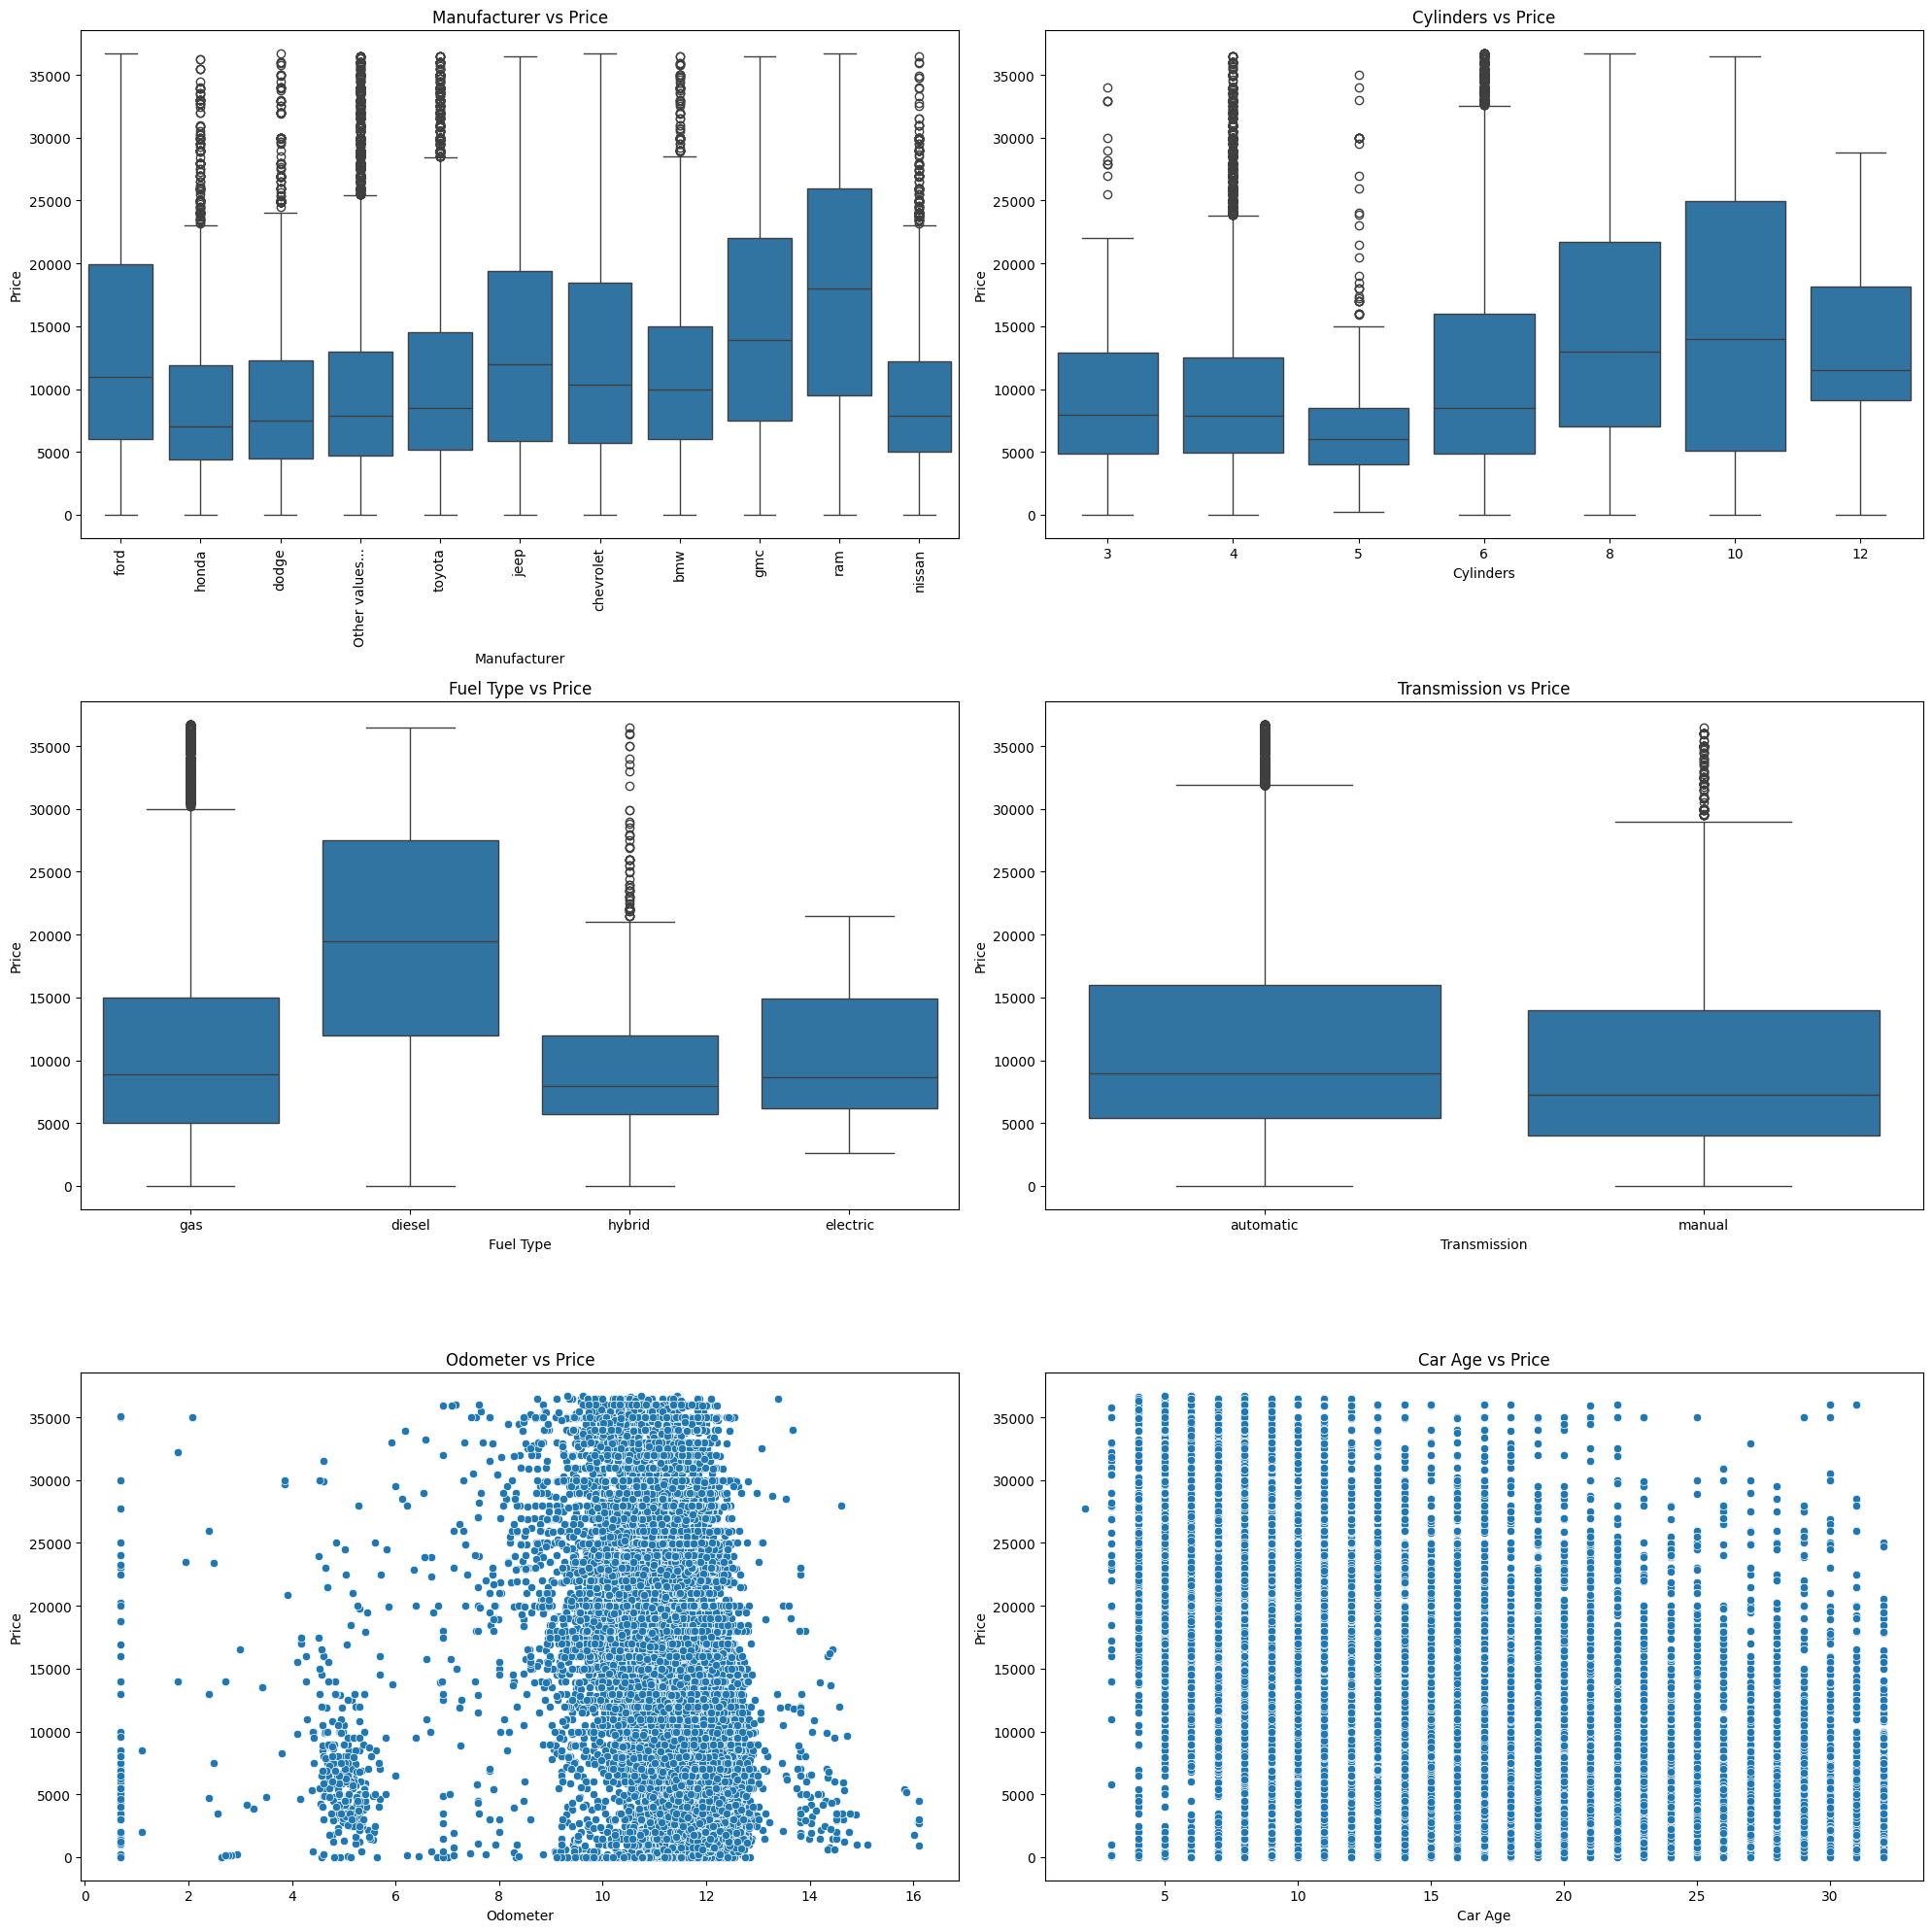

In [19]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Box Plot of Price by Manufacturer
sns.boxplot(x='manufacturer', y='price', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Manufacturer vs Price')
axes[0, 0].set_xlabel('Manufacturer')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params(axis='x', rotation=90)

# Box Plot of Price by Cylinders
sns.boxplot(x='cylinders', y='price', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Cylinders vs Price')
axes[0, 1].set_xlabel('Cylinders')
axes[0, 1].set_ylabel('Price')

# Box Plot of Price by Fuel Type
sns.boxplot(x='fuel', y='price', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Fuel Type vs Price')
axes[1, 0].set_xlabel('Fuel Type')
axes[1, 0].set_ylabel('Price')

# Box Plot of Price by Transmission
sns.boxplot(x='transmission', y='price', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Transmission vs Price')
axes[1, 1].set_xlabel('Transmission')
axes[1, 1].set_ylabel('Price')

# Scatter Plot of Price vs Odometer
sns.scatterplot(x='odometer', y='price', data=df_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Odometer vs Price')
axes[2, 0].set_xlabel('Odometer')
axes[2, 0].set_ylabel('Price')

# Scatter Plot of Price vs Car Age
sns.scatterplot(x='car_age', y='price', data=df_cleaned, ax=axes[2, 1])
axes[2, 1].set_title('Car Age vs Price')
axes[2, 1].set_xlabel('Car Age')
axes[2, 1].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

These box plots illustrate the relationship between car prices and various categorical features: manufacturer, cylinders, fuel type, and transmission.

**Manufacturer vs Price**
+ *BMW and GMC:* These manufacturers show the highest median prices, indicating that their cars tend to be more expensive.
+ *Ford and Honda:* These manufacturers have lower median prices, suggesting that their cars are generally more affordable.
+ *Outliers:* There are significant numbers of outliers for all manufacturers, indicating that within each brand, there are cars priced much higher than the median.

**Cylinders vs Price**
+ *10 and 12 Cylinders:* Cars with these cylinder counts have the highest median prices, reflecting that high-cylinder engines are more expensive, likely due to performance and luxury features.
+ *3 and 4 Cylinders:* Cars with these cylinder counts have the lowest median prices, indicating they are generally more economical or entry-level vehicles.
+ *Outliers:* There are many outliers across all cylinder categories, but especially prominent in 6 and 8 cylinders, showing a wide range of prices within these categories.

**Fuel Type vs Price**
+ *Diesel:* Cars with diesel engines have the highest median prices, suggesting a premium associated with diesel engines, possibly due to efficiency and durability.
+ *Hybrid:* These cars have the lowest median prices, which may indicate a focus on economy and affordability in hybrid models.
+ *Electric and Gas:* Electric cars have higher median prices than gas cars, reflecting the typically higher costs of electric vehicles, but there is considerable overlap and many outliers in both categories.

**Transmission vs Price**
+ *Manual vs Automatic:* Manual transmission cars have a slightly higher median price compared to automatic transmission cars, but both types have a wide range of prices.
+ *Outliers:* Both transmission types show a significant number of outliers, indicating that there are expensive models in both categories, although manual transmissions have a few extremely high outliers.

**Odometer vs Price:**
+ The scatter plot shows that cars with lower odometer readings generally have higher prices.
+ There is a dense cluster of points between odometer readings of 10 and 13 (log-transformed), indicating many cars fall within this mileage range.
+ Higher odometer readings correlate with lower prices, as expected due to the impact of mileage on vehicle value.

**Car Age vs Price:**
+ The scatter plot demonstrates that newer cars (lower car age) generally have higher prices.
+ There is a clear trend where the price decreases as the car age increases.
+ The plot shows a wide range of prices for cars of all ages, with higher variability in older cars.

**Overall Observations**
+ *Manufacturer, Cylinders, and Fuel Type:* These categorical features show distinct price distributions, with higher-end brands, higher cylinder counts, and diesel fuel types commanding higher prices.
+ *Odometer and Car Age:* These continuous features show expected negative correlations with price, indicating that cars with higher mileage and older cars tend to be cheaper.
+ *Outliers:* All plots indicate the presence of significant outliers, highlighting the variability within each category and feature.

These visualizations help in understanding how different features influence car prices, revealing patterns and trends that can inform pricing strategies and vehicle valuations.

### ***Correlation Matrix of Numerical Features and the price***

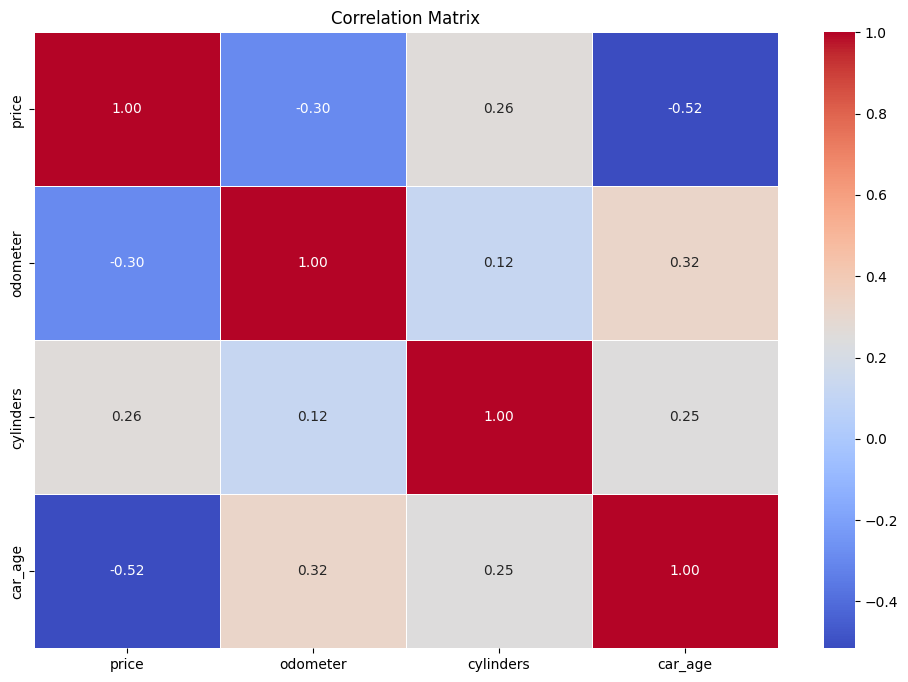

In [20]:
# Correlation Matrix of Numerical Features
corr_matrix = df_cleaned[['price', 'odometer', 'cylinders', 'car_age']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("../images/correlation-matrix.png", bbox_inches='tight')
plt.show()

The correlation matrix provides insights into the linear relationships between different numerical features in the dataset: price, odometer, cylinders, and car age. Here's a detailed explanation of the correlations shown:

**Interpretation of Correlation Values**

*Correlation Coefficient Range:*
+ 1.00: Perfect positive correlation
+ -1.00: Perfect negative correlation
+ 0.00: No correlation
+ Values closer to 1 or -1 indicate stronger correlations.


**Detailed Analysis**

*Price*
+ Price vs Odometer: The correlation coefficient is -0.30, indicating a moderate negative correlation. This means that as the odometer reading increases (higher mileage), the price tends to decrease.
+ Price vs Cylinders: The correlation coefficient is 0.26, indicating a weak positive correlation. This suggests that cars with more cylinders tend to have higher prices.
+ Price vs Car Age: The correlation coefficient is -0.52, indicating a strong negative correlation. This means that older cars tend to have lower prices, which is expected as cars depreciate over time.

*Odometer*
+ Odometer vs Price: As mentioned, a moderate negative correlation of -0.30 suggests that higher mileage is associated with lower prices.
+ Odometer vs Cylinders: The correlation coefficient is 0.12, indicating a very weak positive correlation. This suggests a slight tendency for cars with more cylinders to have higher odometer readings, but the relationship is minimal.
+ Odometer vs Car Age: The correlation coefficient is 0.32, indicating a moderate positive correlation. This means that older cars tend to have higher mileage, which is logical as older cars have been used for a longer time.

*Cylinders*
+ Cylinders vs Price: A weak positive correlation of 0.26 indicates that cars with more cylinders tend to have higher prices.
+ Cylinders vs Odometer: A very weak positive correlation of 0.12, suggesting a minimal relationship between the number of cylinders and odometer readings.
+ Cylinders vs Car Age: The correlation coefficient is 0.25, indicating a weak positive correlation. This suggests that cars with more cylinders might be slightly older on average.

*Car Age*
+ Car Age vs Price: A strong negative correlation of -0.52 indicates that older cars tend to have lower prices.
+ Car Age vs Odometer: A moderate positive correlation of 0.32 suggests that older cars generally have higher mileage.
+ Car Age vs Cylinders: A weak positive correlation of 0.25 indicates that older cars might have slightly more cylinders on average, though this relationship is weak.

**Overall Observations**
+ *Negative Correlations:* Significant negative correlations are observed between price and both odometer and car age, indicating that higher mileage and older cars tend to be cheaper.
+ *Positive Correlations:* Weak to moderate positive correlations are observed between the number of cylinders and price, odometer, and car age, suggesting that cars with more cylinders are generally more expensive and slightly older with higher mileage.
+ *Strongest Correlation:* The strongest correlation is between car age and price (-0.52), highlighting the impact of age on car value.

These insights help in understanding how different numerical features are related and can inform predictive modeling and pricing strategies.

### ***One Hot Encoding of Categorical Features***

In [21]:
# One-hot encoding for categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)
df_encoded.sample(10)


,price,cylinders,odometer,car_age,manufacturer_bmw,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_ram,manufacturer_toyota,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,drive_fwd,drive_rwd,size_full-size,size_mid-size,size_sub-compact,type_SUV,type_convertible,type_coupe,type_hatchback,type_mini-van,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
109635,6700.0,6,11.311470,13,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
14080,7500.0,10,12.525017,24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
373917,9000.0,6,11.355090,14,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
358013,24990.0,4,11.677185,10,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
268575,10975.0,8,11.918397,13,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
257204,8100.0,4,11.880301,15,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
301291,3450.0,5,11.873289,17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
217721,7495.0,4,10.890721,12,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
310204,4500.0,4,11.976339,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
108418,1.0,4,11.608245,23,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


One-hot encoding of categorical features converts them into a format that can be provided to machine learning algorithms to perform better predictions. This encoding transforms each category into a binary column, allowing the model to interpret categorical data as numerical inputs, which is essential since most algorithms require numerical input.

In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59759 entries, 31 to 426833
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    59759 non-null  float64
 1   cylinders                59759 non-null  Int64  
 2   odometer                 59759 non-null  float64
 3   car_age                  59759 non-null  Int64  
 4   manufacturer_bmw         59759 non-null  bool   
 5   manufacturer_chevrolet   59759 non-null  bool   
 6   manufacturer_dodge       59759 non-null  bool   
 7   manufacturer_ford        59759 non-null  bool   
 8   manufacturer_gmc         59759 non-null  bool   
 9   manufacturer_honda       59759 non-null  bool   
 10  manufacturer_jeep        59759 non-null  bool   
 11  manufacturer_nissan      59759 non-null  bool   
 12  manufacturer_ram         59759 non-null  bool   
 13  manufacturer_toyota      59759 non-null  bool   
 14  condition_fair           

This output shows a DataFrame with 53 columns and 59,759 entries, where each row represents a car. The columns include numerical features (price, cylinders, odometer, car_age) and one-hot encoded categorical features (e.g., manufacturer, condition, fuel, title_status, transmission, drive, size, type, paint_color). The data types are Int64, bool, and float64, with memory usage of 5.2 MB, indicating efficient storage of the one-hot encoded boolean columns.

## **Modeling**

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### ***Perform Grid Search to find the best models***

In [23]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import warnings

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Step 1: Split dataset into features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grids
param_grids = {
    'Linear': {},
    'Ridge': {
        'model__alpha': [0.0001, 0.0002, 0.001]
    },
    'Lasso': {
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__max_iter': [1000, 5000, 7000]
    },
    'Polynomial': {
        'poly__degree': [2],
        'model__alpha': [700.0, 800.0, 900.0]
    },
    'RandomForest': {
        'model__n_estimators': [500, 600],
        'model__max_depth': [40, 50]
    },
    'XGBoost': {
        'model__n_estimators': [500, 600],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [11, 13]
    }
}

# Define models
models = {
    'Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'Ridge': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge())
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso())
    ]),
    'Polynomial': Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures()),
        ('model', Ridge())
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBRegressor(random_state=42))
    ])
}

# Function to perform grid search
def grid_search_model(model_name, model, param_grid, X_train, y_train):
    print(f"Executing model: {model_name}")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

# Perform grid search for each model
best_models = {}
cv_results = []
best_params_and_scores = []
for model_name, model in models.items():
    best_model = grid_search_model(model_name, model, param_grids[model_name], X_train, y_train)
    best_models[model_name] = best_model

    # Store cross-validation results
    cv_results.append(pd.DataFrame(best_model.cv_results_).assign(Model=model_name))

    # Store best parameters and scores
    best_params_and_scores.append({
        'Model': model_name,
        'Best Parameters': best_model.best_params_,
        'Best Score': -best_model.best_score_
    })

# Combine all cross-validation results into a single DataFrame
cv_results_df = pd.concat(cv_results, ignore_index=True)

# Create DataFrame for best parameters and scores
best_params_and_scores_df = pd.DataFrame(best_params_and_scores)

# Evaluate the best model on the test set
results = {
    'Model': [],
    'MAE': [],
    'RMSE': [],
    'R²': []
}

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['R²'].append(r2)

results_df = pd.DataFrame(results)

# Display the results DataFrame, the best parameters and scores DataFrame, and the cross-validation results DataFrame
print("\nCross-Validation Results:")
display(cv_results_df)

print("\nBest Parameters and Scores:")
display(best_params_and_scores_df)

print("Test Set Evaluation Results:")
display(results_df)


Executing model: Linear
Executing model: Ridge
Executing model: Lasso


/Users/vijay/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e+10, tolerance: 2.350e+08
  model = cd_fast.enet_coordinate_descent(
/Users/vijay/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.121e+10, tolerance: 2.340e+08
  model = cd_fast.enet_coordinate_descent(
/Users/vijay/.pyenv/versions/3.12.2/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

Executing model: Polynomial
Executing model: RandomForest


/Users/vijay/.pyenv/versions/3.12.2/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Executing model: XGBoost

Cross-Validation Results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,Model,param_model__alpha,param_model__max_iter,param_poly__degree,param_model__max_depth,param_model__n_estimators,param_model__learning_rate
0,0.056180,0.001790,0.004439,0.000239,{},-3755.263305,-3744.201960,-3781.822504,-3748.340301,-3735.386523,-3753.002918,15.781078,1,Linear,NaN,NaN,NaN,NaN,NaN,NaN
1,0.030281,0.002223,0.005073,0.000309,{'model__alpha': 0.0001},-3755.263306,-3744.201960,-3781.822504,-3748.340302,-3735.386523,-3753.002919,15.781078,1,Ridge,0.0001,NaN,NaN,NaN,NaN,NaN
2,0.029654,0.004763,0.004738,0.000404,{'model__alpha': 0.0002},-3755.263307,-3744.201961,-3781.822505,-3748.340303,-3735.386523,-3753.002920,15.781078,2,Ridge,0.0002,NaN,NaN,NaN,NaN,NaN
3,0.027556,0.005444,0.004196,0.000198,{'model__alpha': 0.001},-3755.263317,-3744.201964,-3781.822512,-3748.340310,-3735.386525,-3753.002926,15.781080,3,Ridge,0.0010,NaN,NaN,NaN,NaN,NaN
4,3.470792,0.028555,0.008882,0.001712,"{'model__alpha': 0.0001, 'model__max_iter': 1000}",-3755.263305,-3744.201960,-3781.822512,-3748.340342,-3735.386549,-3753.002934,15.781073,3,Lasso,0.0001,1000.0,NaN,NaN,NaN,NaN
5,4.409316,0.128955,0.011090,0.004060,"{'model__alpha': 0.0001, 'model__max_iter': 5000}",-3755.263297,-3744.201953,-3781.822509,-3748.340327,-3735.386547,-3753.002927,15.781074,1,Lasso,0.0001,5000.0,NaN,NaN,NaN,NaN
6,4.412846,0.184438,0.008442,0.001604,"{'model__alpha': 0.0001, 'model__max_iter': 7000}",-3755.263297,-3744.201953,-3781.822509,-3748.340327,-3735.386547,-3753.002927,15.781074,1,Lasso,0.0001,7000.0,NaN,NaN,NaN,NaN
7,3.531317,0.030740,0.007987,0.000222,"{'model__alpha': 0.001, 'model__max_iter': 1000}",-3755.263228,-3744.201896,-3781.822558,-3748.340573,-3735.386767,-3753.003004,15.781032,6,Lasso,0.0010,1000.0,NaN,NaN,NaN,NaN
8,3.780854,0.114457,0.009795,0.002931,"{'model__alpha': 0.001, 'model__max_iter': 5000}",-3755.263225,-3744.201892,-3781.822557,-3748.340563,-3735.386765,-3753.003001,15.781033,4,Lasso,0.0010,5000.0,NaN,NaN,NaN,NaN
9,3.804171,0.099204,0.008010,0.000890,"{'model__alpha': 0.001, 'model__max_iter': 7000}",-3755.263225,-3744.201892,-3781.822557,-3748.340563,-3735.386765,-3753.003001,15.781033,4,Lasso,0.0010,7000.0,NaN,NaN,NaN,NaN



Best Parameters and Scores:


,Model,Best Parameters,Best Score
0,Linear,{},3753.002918
1,Ridge,{'model__alpha': 0.0001},3753.002919
2,Lasso,"{'model__alpha': 0.0001, 'model__max_iter': 5000}",3753.002927
3,Polynomial,"{'model__alpha': 700.0, 'poly__degree': 2}",2911.920206
4,RandomForest,"{'model__max_depth': 50, 'model__n_estimators': 500}",2293.854221
5,XGBoost,"{'model__learning_rate': 0.1, 'model__max_depth': 13, 'model__n_estimators': 500}",2267.880054


Test Set Evaluation Results:


,Model,MAE,RMSE,R²
0,Linear,3728.923575,5159.576420,0.615608
1,Ridge,3728.923575,5159.576420,0.615608
2,Lasso,3728.923596,5159.576407,0.615608
3,Polynomial,2882.766363,4279.482875,0.735559
4,RandomForest,2195.942804,3511.361684,0.821968
5,XGBoost,2171.803138,3565.802646,0.816405


**Best Parameters and Scores**
+ *Linear Model:* The linear model, with no hyperparameters to tune, achieved a best cross-validation score (MAE) of 3728.92.

+ *Ridge Regression:* The Ridge regression model with an alpha value of 0.0001 achieved a similar best score to the linear model, indicating very little regularization was needed.

+ *Lasso Regression:* The Lasso regression model, with an alpha of 0.0001 and 5000 maximum iterations, also performed similarly to the linear model, suggesting minimal impact of Lasso regularization.

+ *Polynomial Regression:* The polynomial regression model, with a degree of 2 and a Ridge regularization alpha of 700, significantly improved the cross-validation score, indicating a better fit to the data.

+ *Random Forest:* The Random Forest model, with a max depth of 50 and 500 estimators, achieved a much better score, suggesting that ensemble methods provide a substantial performance boost.

+ *XGBoost:* The XGBoost model, with a learning rate of 0.1, max depth of 13, and 500 estimators, achieved the best cross-validation score, indicating it is the most effective model for this dataset.


**Test Set Evaluation Results**
+ *Linear Model:* The linear model's performance on the test set aligns closely with its cross-validation score, indicating it provides a consistent baseline.

+ *Ridge Regression:* Ridge regression performed identically to the linear model, further confirming that minimal regularization was needed.

+ *Lasso Regression:* Lasso regression also mirrored the linear model's performance, showing no significant impact from Lasso regularization.

+ *Polynomial Regression:* Polynomial regression showed improved performance with lower MAE and RMSE and higher R², indicating a better fit to the data.

+ *Random Forest:* The Random Forest model significantly improved performance metrics, demonstrating the strength of ensemble methods in capturing data complexity.

+ *XGBoost:* XGBoost provided the best performance with the lowest MAE and RMSE and high R², confirming its effectiveness for this regression task.

**Summary**
+ *Best Performing Model:* XGBoost, with the lowest error metrics and highest R², indicating the best predictive accuracy.
+ *Notable Improvement:* Ensemble methods (Random Forest and XGBoost) significantly outperform simpler linear models and polynomial regression, capturing more complex relationships in the data.
+ *Regularization:* Minimal impact from Ridge and Lasso regularization, suggesting the linear relationship between features and the target is not heavily affected by overfitting issues.

## **Evaluation**

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### ***Evaluate the models and visualize residuals.***

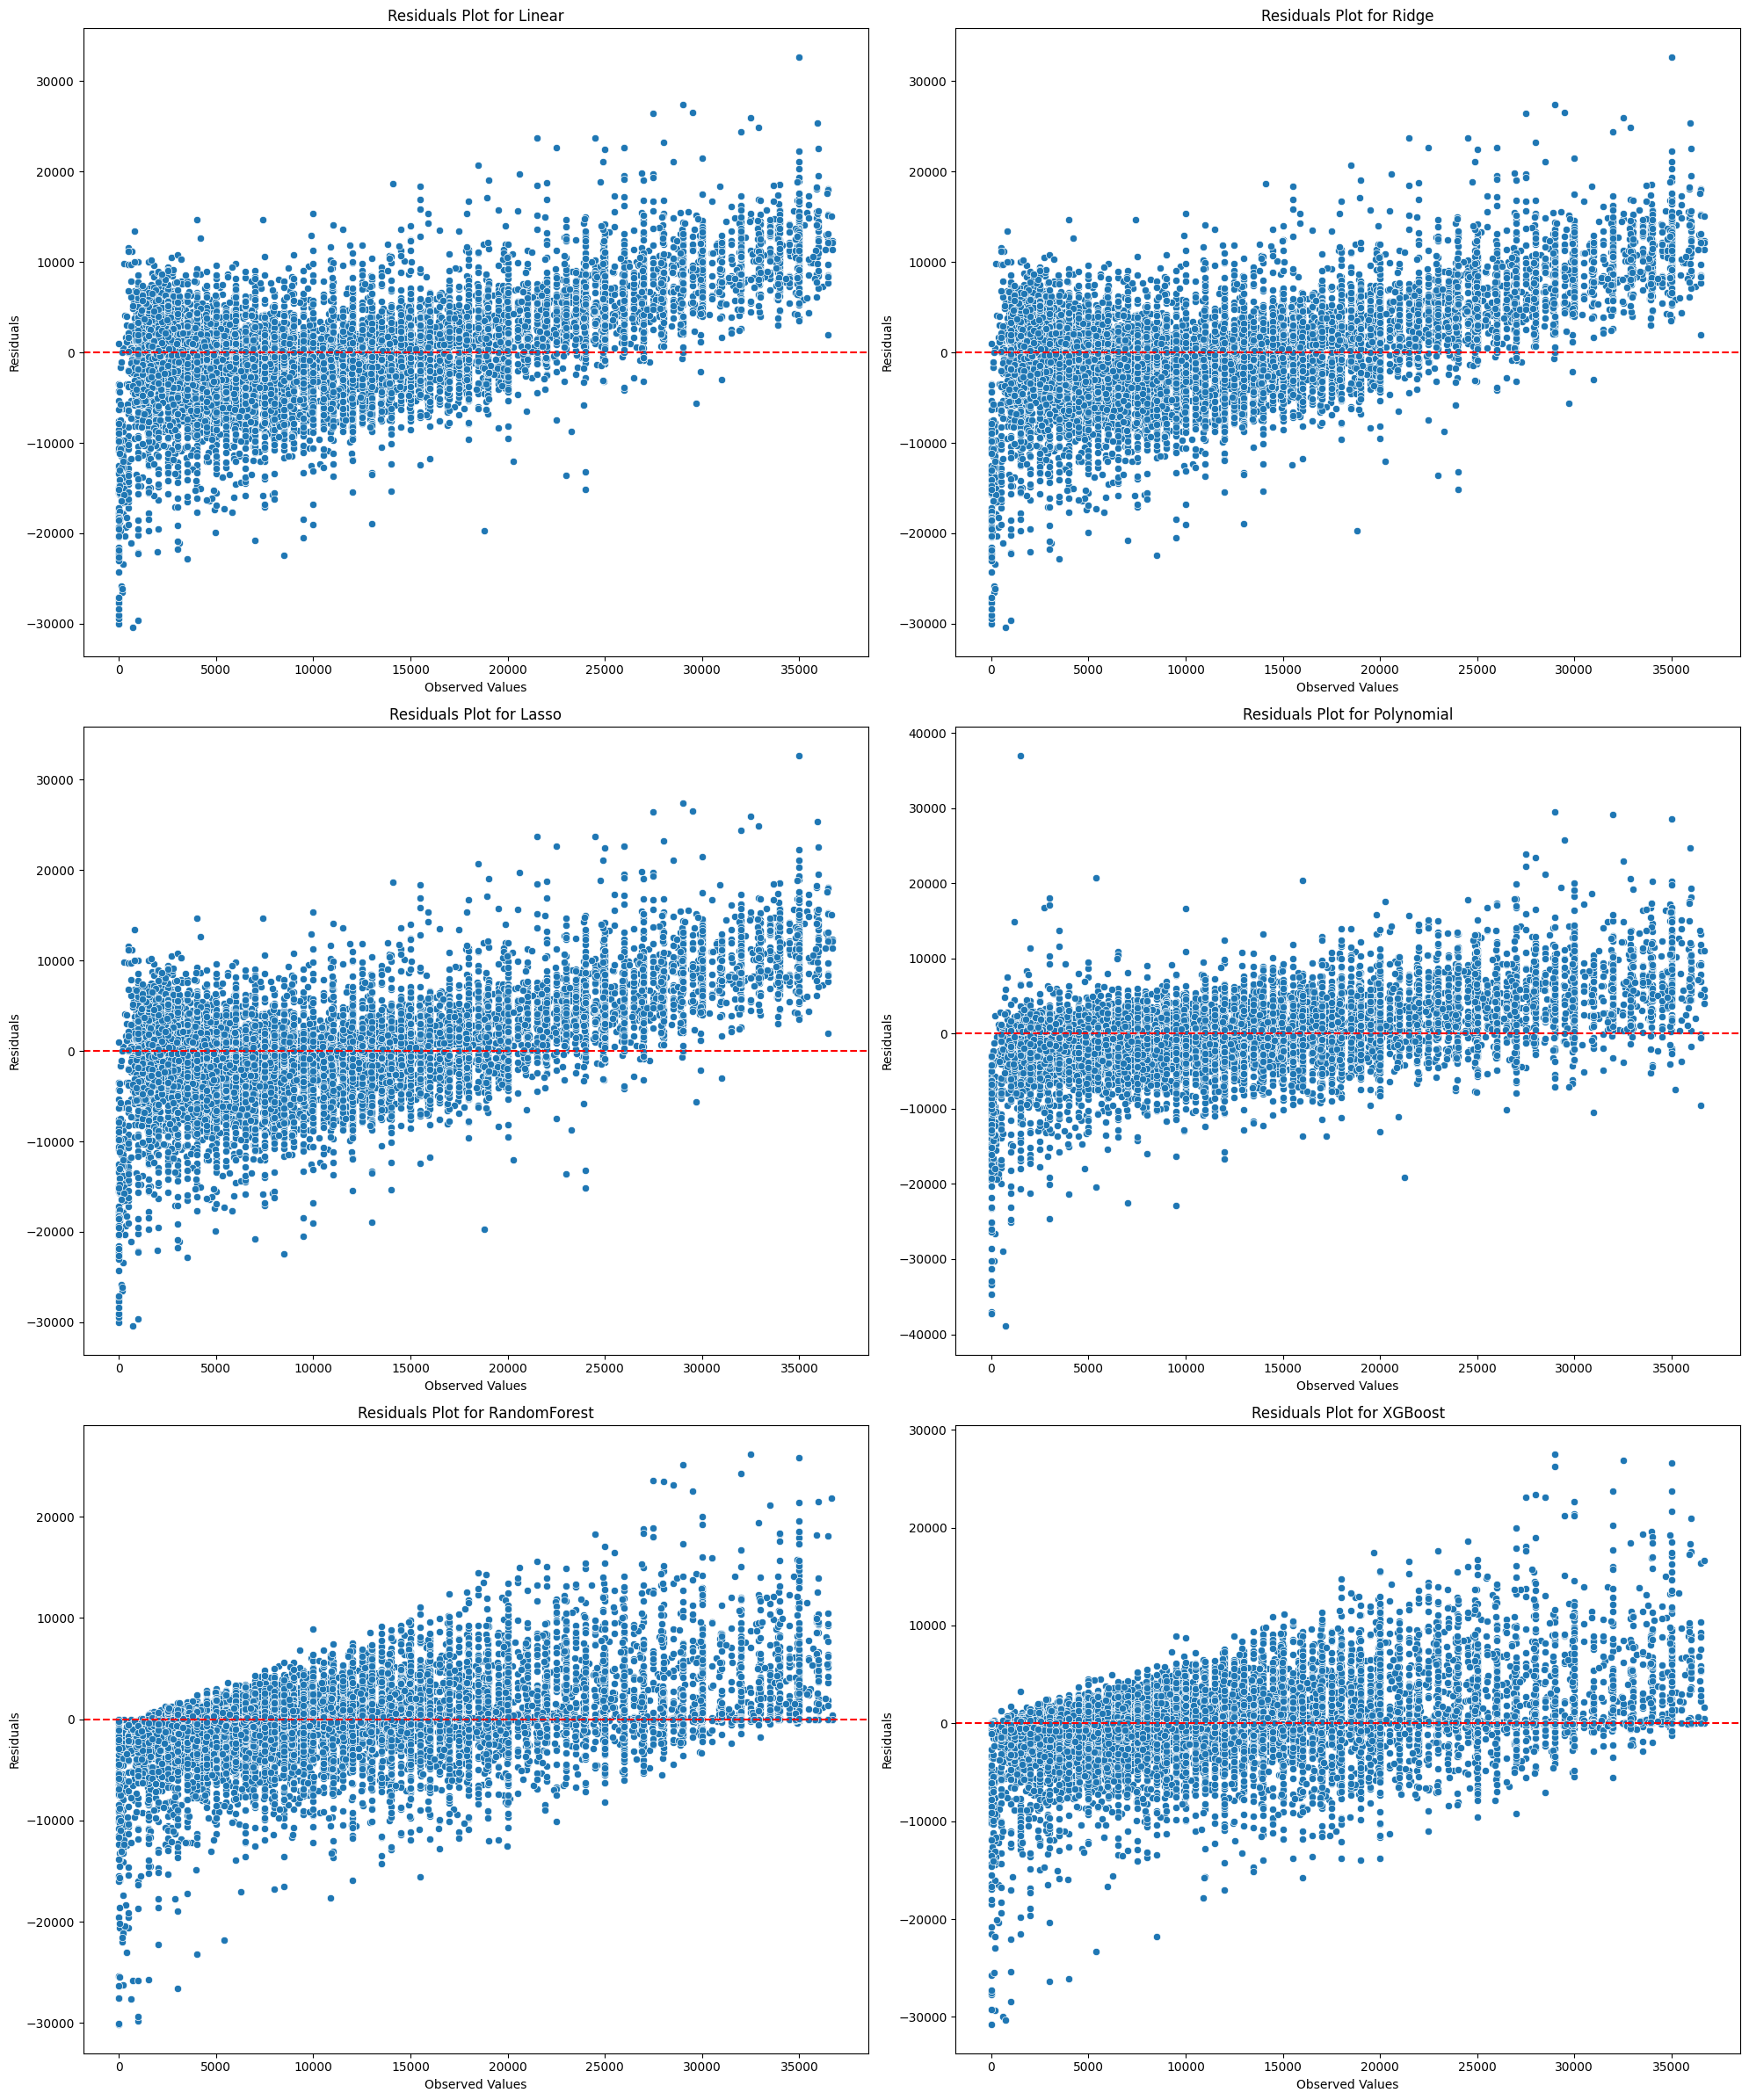

In [24]:
fig, axes = plt.subplots(len(best_models) // 2 + len(best_models) % 2, 2, figsize=(20, len(best_models) * 4))

# Evaluate the best model on the test set and visualize residuals
for i, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    ax = axes[i // 2, i % 2]
    sns.scatterplot(x=y_test, y=residuals, ax=ax)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title(f'Residuals Plot for {model_name}')
    ax.set_xlabel('Observed Values')
    ax.set_ylabel('Residuals')

    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("../images/residual-plots.png", bbox_inches='tight')
plt.show()

These residual plots display the residuals (the difference between the observed and predicted values) for six different models: Linear, Ridge, Lasso, Polynomial, Random Forest, and XGBoost. Each plot helps in assessing the performance and appropriateness of the models for the given dataset.

**Detailed Explanation**
+ Linear Model:
  + Plot Characteristics: Residuals are spread out horizontally and show a pattern, indicating that the model might not capture all the non-linear relationships in the data.
  + Observations: There is a funnel shape, where residuals increase with higher observed values, suggesting heteroscedasticity (variance of residuals changes with the value of the target variable).

+ Ridge Regression:
  + Plot Characteristics: Similar to the linear model since Ridge is a regularized linear regression model.
  + Observations: The pattern and spread are nearly identical to the linear model, confirming minimal impact from regularization.

+ Lasso Regression:
  + Plot Characteristics: Again, similar to the linear model due to its linear nature but includes L1 regularization.
  + Observations: The residual spread and patterns are consistent with the linear and Ridge models, indicating little change due to Lasso regularization.

+ Polynomial Regression:
  + Plot Characteristics: Residuals are more evenly spread without a clear pattern, suggesting a better fit to the data compared to linear models.
  + Observations: The absence of a strong pattern indicates that polynomial regression captures some non-linear relationships, improving model fit.

+ Random Forest:
  + Plot Characteristics: Residuals are closer to zero with less spread, indicating a better fit.
  + Observations: The pattern is less pronounced compared to linear models, showing that Random Forest captures more complex relationships in the data.

+ XGBoost:
  + Plot Characteristics: Residuals are distributed similarly to Random Forest, with even less spread and closer clustering around zero.
  + Observations: The tight clustering and minimal pattern suggest XGBoost has the best fit, capturing non-linear relationships and reducing residual variance effectively.

**Overall Observations**
+ *Pattern Recognition:* Linear, Ridge, and Lasso models show clear patterns and wider spread in residuals, indicating they do not fully capture the complexity of the data.
+ *Variance and Spread:* Polynomial regression reduces the residual spread and patterns, improving the fit. However, the most significant improvements are seen in Random Forest and XGBoost models.
+ *Model Fit:* Random Forest and XGBoost have the best performance with the least residual variance and pattern, demonstrating their capability to handle complex, non-linear relationships in the data effectively.

These residual plots visually confirm the numerical evaluation results, where ensemble methods (Random Forest and XGBoost) outperform simpler linear models by providing better fits and capturing more data complexity.

### ***Extract and visualize the feature importances for each linear model.***

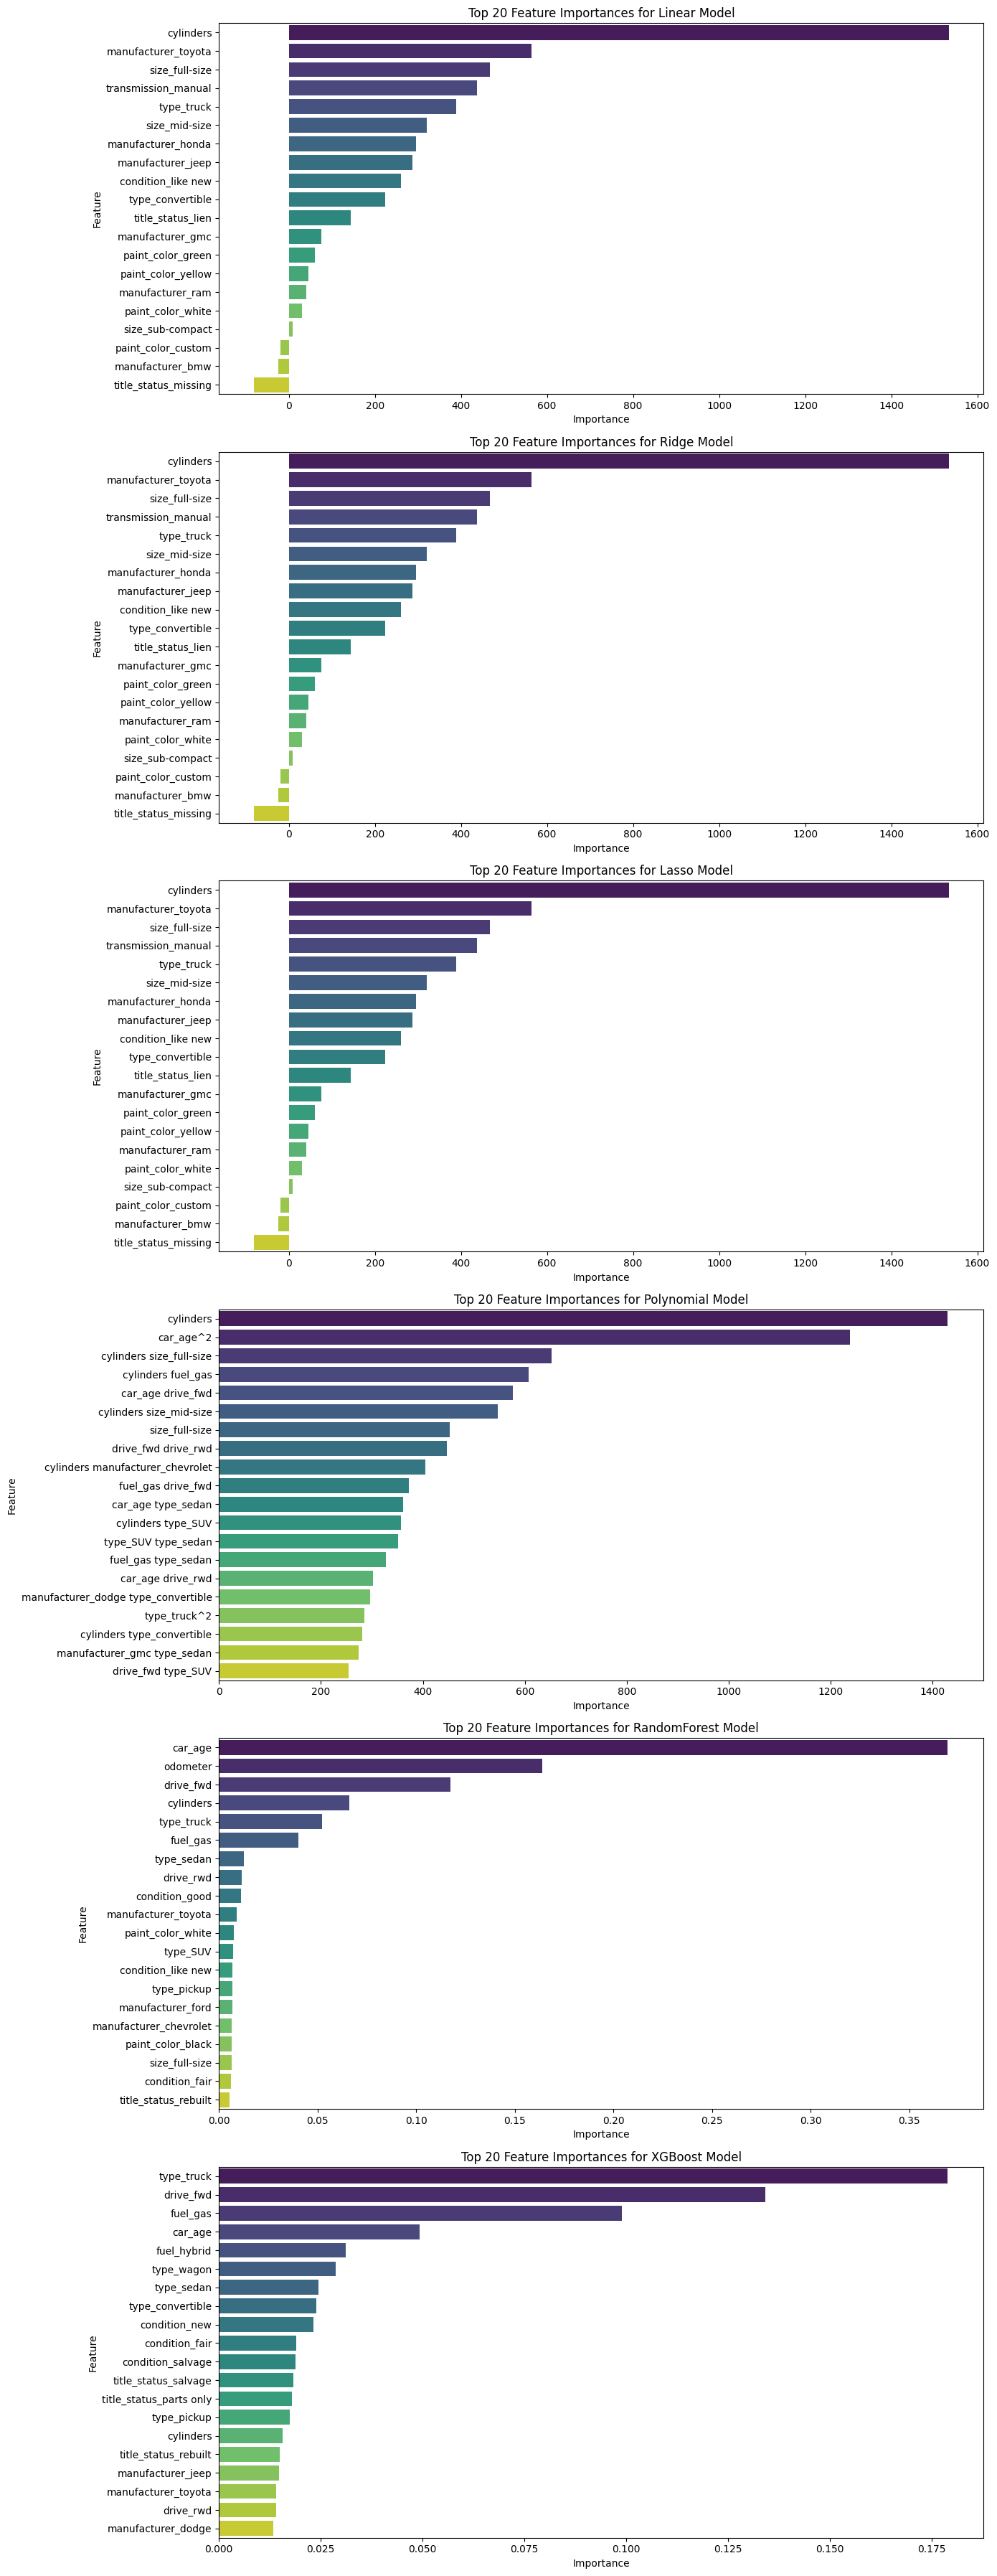

In [25]:
from sklearn.preprocessing import PolynomialFeatures

# Extract and combine feature importances
feature_importances = pd.DataFrame()

for model_name, model in best_models.items():
    if model_name == 'Polynomial':
        poly_features = PolynomialFeatures(degree=model.best_params_['poly__degree']).fit(X_train)
        feature_names = poly_features.get_feature_names_out(X.columns)
        coefficients = model.best_estimator_.named_steps['model'].coef_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients,
            'Model': model_name
        })
    elif model_name in ['RandomForest', 'XGBoost']:
        feature_names = X.columns
        importances = model.best_estimator_.named_steps['model'].feature_importances_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Model': model_name
        })
    else:
        feature_names = X.columns
        coefficients = model.best_estimator_.named_steps['model'].coef_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients,
            'Model': model_name
        })
    
    feature_importances = pd.concat([feature_importances, temp_df])

# Show only top feature importances for each model
top_n = 20
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
top_features = feature_importances.groupby('Model').head(top_n)

# Create subplots
n_models = len(top_features['Model'].unique())
fig, axes = plt.subplots(n_models, 1, figsize=(14, 6 * n_models))

# Plot top feature importances for each model
for i, model_name in enumerate(top_features['Model'].unique()):
    model_top_features = top_features[top_features['Model'] == model_name]
    sns.barplot(x='Importance', y='Feature', hue='Feature', data=model_top_features, palette='viridis', dodge=False, ax=axes[i], legend=False)
    axes[i].set_title(f'Top {top_n} Feature Importances for {model_name} Model')
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Feature')

plt.tight_layout()
plt.savefig("../images/feature-importance.png", bbox_inches='tight')
plt.show()

These subplots display the top 20 feature importances for each model: Linear, Ridge, Lasso, Polynomial, Random Forest, and XGBoost. Each subplot helps in understanding which features are most influential in predicting the price of a car for each respective model.

**Detailed Explanation**
+ Linear Model:
  + Top Features: Cylinders, manufacturer (e.g., Toyota, Jeep, Honda), and size (full-size, mid-size).
  + Observations: Cylinders have the highest importance, indicating a strong relationship with price. Manufacturer and size features also play significant roles.

+ Ridge Regression:
  + Top Features: Similar to the linear model with cylinders, manufacturer (e.g., Toyota, Honda, Jeep), and size.
  + Observations: The feature importances are similar to the linear model, which is expected since Ridge is a regularized version of linear regression.

+ Lasso Regression:
  + Top Features: Again, similar to the linear and Ridge models, with cylinders, manufacturer (e.g., Toyota, Honda, Jeep), and size.
  + Observations: The feature importances are nearly identical to those of the linear and Ridge models, indicating consistent influential features across these linear models.

+ Polynomial Regression:
  + Top Features: Cylinders, interaction terms (e.g., car_age^2, cylinders * size_full-size), and size.
  + Observations: Polynomial regression introduces interaction terms and polynomial features, indicating complex relationships between features (e.g., the interaction between car age and cylinders).

+ Random Forest:
  + Top Features: Car age, odometer, drive type (fwd, rwd), type (truck), and fuel type (gas).
  + Observations: Random Forest highlights the importance of car age and odometer, which are continuous features. Drive type and fuel type also show significant importance, indicating diverse influential factors.

+ XGBoost:
  + Top Features: Type (truck), drive type (fwd), fuel type (gas), car age, and condition (new).
  + Observations: XGBoost places high importance on car type and drive type, with significant contributions from fuel type and car age. The model captures complex interactions and non-linear relationships effectively.

**Overall Observations**
+ Cylinders: Consistently important across linear models, indicating a strong correlation with price.
+ Manufacturer and Size: Important in linear models but less so in ensemble models, suggesting their influence is more straightforward and easily captured by linear relationships.
+ Car Age and Odometer: Highly influential in ensemble models (Random Forest and XGBoost), highlighting their critical role in determining car prices.
+ Interaction Terms: Polynomial regression introduces complex interactions, showing the nuanced relationships between features.
+ Diverse Influences in Ensemble Models: Random Forest and XGBoost highlight a broader range of influential features, capturing more complex patterns in the data.

These insights indicate the varying importance of different features across models and the ability of ensemble methods to capture more complex relationships compared to linear models. This analysis helps in understanding which features are most critical for accurate price prediction in used cars.

### ***Compare Feature Importance across Models***

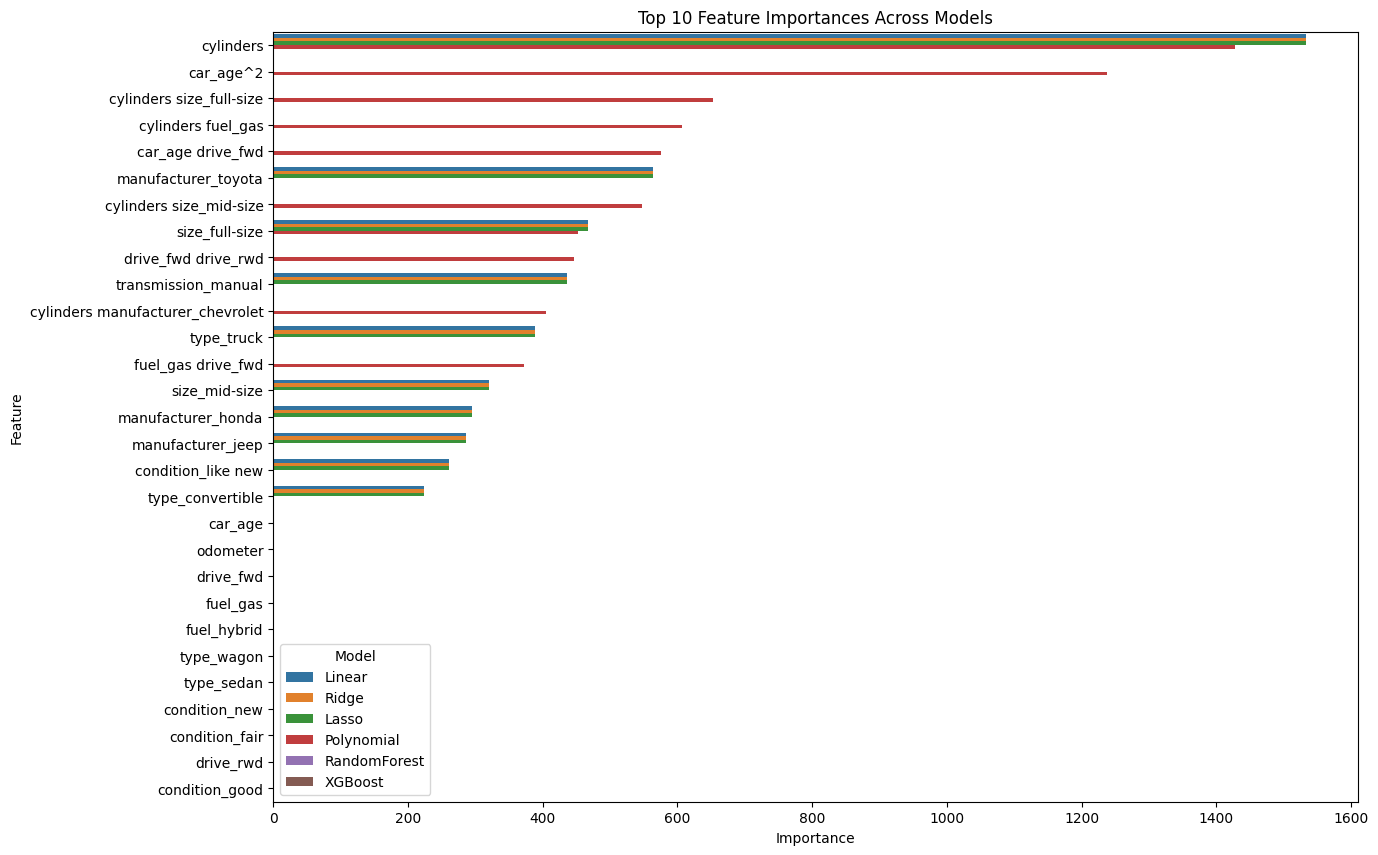

In [26]:
# Extract and combine feature importances
feature_importances = pd.DataFrame()

for model_name, model in best_models.items():
    if model_name == 'Polynomial':
        poly_features = PolynomialFeatures(degree=model.best_params_['poly__degree']).fit(X_train)
        feature_names = poly_features.get_feature_names_out(X.columns)
        coefficients = model.best_estimator_.named_steps['model'].coef_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients,
            'Model': model_name
        })
    elif model_name in ['RandomForest', 'XGBoost']:
        feature_names = X.columns
        importances = model.best_estimator_.named_steps['model'].feature_importances_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Model': model_name
        })
    else:
        feature_names = X.columns
        coefficients = model.best_estimator_.named_steps['model'].coef_
        temp_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients,
            'Model': model_name
        })
    
    feature_importances = pd.concat([feature_importances, temp_df])

# Show only top feature importances for each model
top_n = 10
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
top_features = feature_importances.groupby('Model').head(top_n)

# Plot top feature importances across models
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', hue='Model', data=top_features)
plt.title(f'Top {top_n} Feature Importances Across Models')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.show()

This bar chart displays the top 10 feature importances across different regression models: Linear, Ridge, Lasso, Polynomial, Random Forest, and XGBoost. Each color represents a different model, showing the importance of each feature in predicting the car prices.

**Detailed Explanation**
+ Cylinders: This feature has the highest importance across all models, indicating a strong relationship with car prices. It is most important in linear models (Linear, Ridge, Lasso) and Polynomial, highlighting its consistent influence.
+ Car Age (Squared Term): Highly important in the Polynomial model, indicating that the squared term of car age captures a significant non-linear relationship with price.
+ Cylinders Interactions (e.g., with Fuel and Size): In the Polynomial model, interactions such as "cylinders fuel_gas" and "cylinders size_full-size" are crucial, indicating that the combination of these features significantly affects price predictions.
+ Manufacturer (e.g., Toyota): Manufacturer features like Toyota show significant importance across linear models, indicating brand influence on car prices.
+ Drive Type and Transmission: Features like "drive_fwd" and "transmission_manual" are important across several models, particularly in ensemble methods like Random Forest and XGBoost, suggesting that drivetrain and transmission type play key roles in price determination.
+ Fuel Type and Size: Fuel type (e.g., gas) and size (e.g., full-size, mid-size) are consistently important across models, highlighting their impact on car prices.
+ Odometer and Car Age: These features are particularly important in ensemble methods, indicating their crucial role in predicting prices.
+ Condition and Type: Features like "condition_like new" and "type_convertible" show up across models, indicating the condition and type of car as significant predictors of price.

**Overall Observations**
+ Consistency Across Models: Features like cylinders, car age, and manufacturer show consistent importance across different models, reinforcing their strong relationship with car prices.
+ Polynomial and Interactions: The Polynomial model highlights the importance of interaction terms and polynomial features, suggesting complex relationships between features.
+ Ensemble Methods: Random Forest and XGBoost models capture a broader range of feature importances, including non-linear relationships and interactions not as apparent in linear models.
+ Model-Specific Differences: Each model emphasizes different aspects of the features, with linear models focusing on direct relationships and ensemble methods capturing more complex patterns.

This analysis highlights the importance of various features and their interactions, helping to understand which aspects of the car data are most influential in predicting prices.

### **Deployment**

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Please refer to the README file for a basic report on the findings.